# Start with `spudtr` epochs

In [8]:
from spudtr import epf, fake_epochs_data
from spudtr import DATA_DIR

# generate simulated data: sim_epochs_df
n_epochs_per_category = 2
sim_epochs_df, channels = fake_epochs_data._generate(
    n_epochs=n_epochs_per_category,
    n_samples=32,
    n_categories=2,
    n_channels=4,
    time="day",
    epoch_id="epoch_id",
    seed=10,
)
print("Simulated epochs")
epf.check_epochs(sim_epochs_df, ["channel0", "channel1"], epoch_id="epoch_id", time="day")
display(sim_epochs_df.head())


# load EEG epochs: eeg_epochs_df
import pandas as pd
eeg_epochs_df = pd.read_hdf(DATA_DIR / "sub000p3.epochs.h5", key="p3").query("stim in ['standard', 'target']")
eeg_channels = ['MiPf', 'MiCe', 'MiPa', 'MiOc']
epf.check_epochs(eeg_epochs_df, eeg_channels, epoch_id="epoch_id", time="time_ms")

print("EEG epochs")
display(eeg_epochs_df.head())

Simulated epochs


,epoch_id,day,categorical,continuous,channel0,channel1,channel2,channel3
0,0,0,cat0,0.771321,-13.170787,-30.197057,19.609869,43.177612
1,0,1,cat0,0.020752,4.233125,-7.726009,-65.298259,41.464399
2,0,2,cat0,0.633648,8.191480,21.915223,18.568468,27.639613
3,0,3,cat0,0.748804,-48.557122,-50.952045,14.317029,-17.186617
4,0,4,cat0,0.498507,-17.193401,50.222266,0.782896,38.251473


EEG epochs


,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,stim,accuracy,acc_type,exp
0,0,-100,0,False,demonstration,-48.0,23.015625,46.03125,11.656250,target,correct,hit,p3
1,0,-96,0,False,demonstration,-52.5,19.984375,41.96875,6.800781,target,correct,hit,p3
2,0,-92,0,False,demonstration,-51.5,22.765625,43.18750,7.773438,target,correct,hit,p3
3,0,-88,0,False,demonstration,-54.0,21.750000,38.87500,5.101562,target,correct,hit,p3
4,0,-84,0,False,demonstration,-55.0,19.984375,34.81250,5.343750,target,correct,hit,p3


# `pandas.DataFrame.groupby().plot()` 

Quick and easy but may be slow on large data sets

Good for rough work and eye-ball checks but need so much tuning for finished figures, may as well use matplotlib from the start for that.

Simulated data


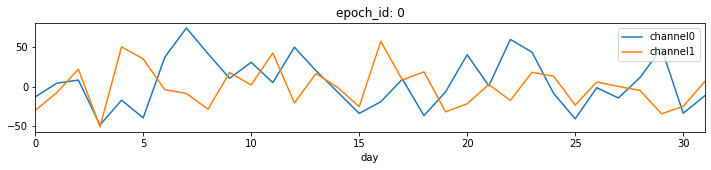

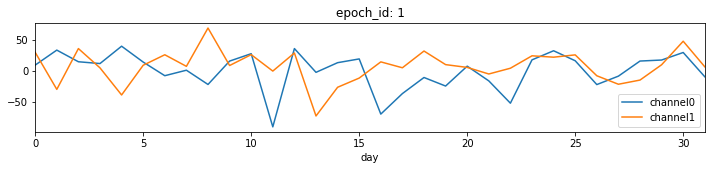

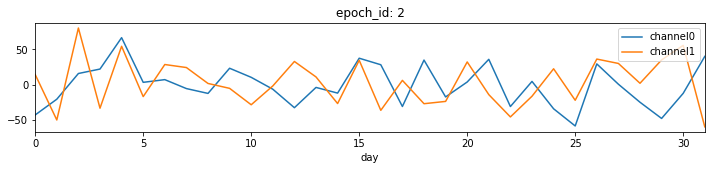

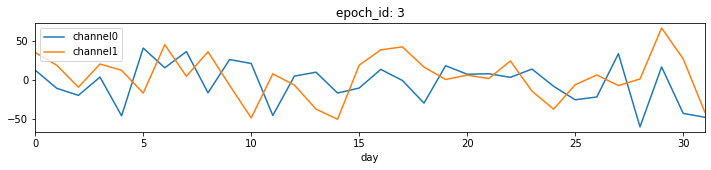

In [2]:
import pandas as pd
print("Simulated data")
for epoch_i, data in sim_epochs_df.groupby('epoch_id'):
    f = data.plot(
        x='day',
        y=['channel0', 'channel1'], 
        title=f'epoch_id: {epoch_i}',
        figsize=(12,2)
    )

# `matplotlib.pyplot`

More work but flexible enough for publication quality figures.

There are lots of ways to slice the data for plotting. Some are easier, some are faster.

In [ ]:
# Example: Overplot single trial EEG

In [110]:
leg_h
axs[0].legend(leg_h)

AttributeError: 'Legend' object has no attribute 'lines'

(292, 275, 4)
(300, 275, 4)
CPU times: user 1.23 s, sys: 45 ms, total: 1.28 s
Wall time: 1.27 s


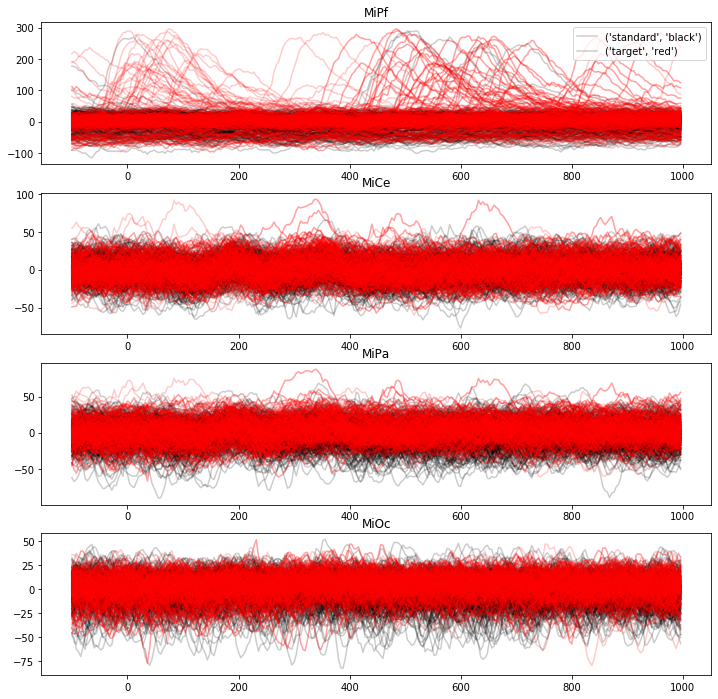

In [111]:
%%time

plt.close('all')
from matplotlib import pyplot as plt
f, axs = plt.subplots(4, 1, figsize=(12,12))
colors = {"standard": "black", "target": "red"}

time_stamps = eeg_epochs_df.time_ms.unique()
n_times = len(time_stamps)
n_channels = len(eeg_channels)
leg_h = []
for condition, trials in eeg_epochs_df.groupby('stim'):
    leg_h.append((condition, colors[condition]))
    n_trials = len(trials)
    trial_arry = (
        trials[eeg_channels]
        .to_numpy()
        .reshape(int(n_trials / n_times), n_times, n_channels)
    )
    print(trial_arry.shape)
    for chan_idx, channel in enumerate(eeg_channels):
        axs[chan_idx].plot(
            time_stamps,
            trial_arry[:, :, chan_idx].squeeze().T, 
            color=colors[condition], 
            alpha=.2,
        )
        axs[chan_idx].set_title(channel)
    
axs[0].legend(leg_h);

CPU times: user 10.7 s, sys: 189 ms, total: 10.9 s
Wall time: 10.9 s


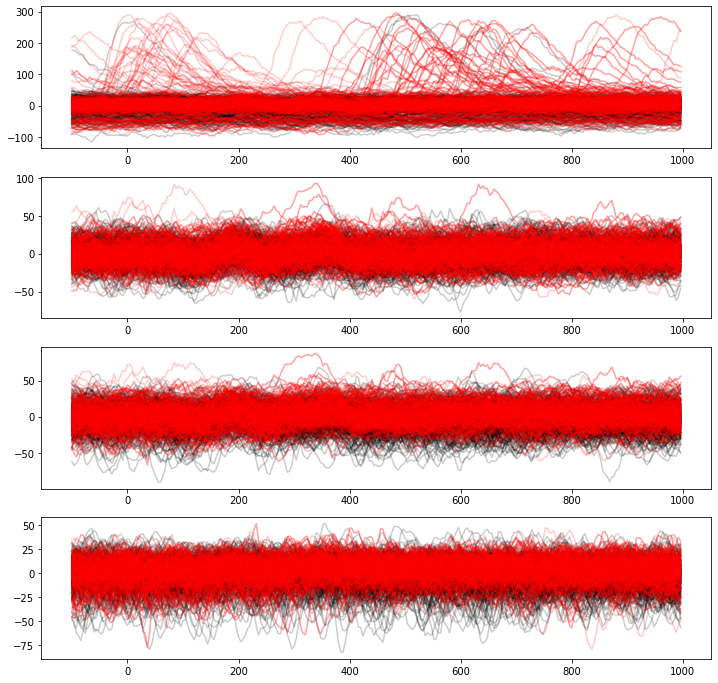

In [94]:
%%time

from matplotlib import pyplot as plt
f, axs = plt.subplots(4, 1, figsize=(12,12))
colors = {"standard": "black", "target": "red"}

for condition, trials in eeg_epochs_df.groupby('stim'):
    for epoch_idx, trial in trials.groupby('epoch_id'):            
        for chan_idx, channel in enumerate(eeg_channels):
            axs[chan_idx].plot(
                eeg_epochs_df.time_ms.unique(),
                trial[eeg_channels].to_numpy()[:, chan_idx], 
                color=colors[condition],
                alpha=.2
            )
#axs[0].legend(colors);

In [61]:
eeg_epochs_df.set_index('stim').head()

,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,accuracy,acc_type,exp
stim,,,,,,,,,,,,
target,0,-100,0,False,demonstration,-48.0,23.015625,46.03125,11.656250,correct,hit,p3
target,0,-96,0,False,demonstration,-52.5,19.984375,41.96875,6.800781,correct,hit,p3
target,0,-92,0,False,demonstration,-51.5,22.765625,43.18750,7.773438,correct,hit,p3
target,0,-88,0,False,demonstration,-54.0,21.750000,38.87500,5.101562,correct,hit,p3
target,0,-84,0,False,demonstration,-55.0,19.984375,34.81250,5.343750,correct,hit,p3


# Preview epochs rows and columns

The default display is to preview five lines of the head and tail.

In [16]:
display(sim_epochs_df)

,epoch_id,day,categorical,continuous,channel0,channel1,channel2,channel3
0,0,0,cat0,0.771321,-13.170787,-30.197057,19.609869,43.177612
1,0,1,cat0,0.020752,4.233125,-7.726009,-65.298259,41.464399
2,0,2,cat0,0.633648,8.191480,21.915223,18.568468,27.639613
3,0,3,cat0,0.748804,-48.557122,-50.952045,14.317029,-17.186617
4,0,4,cat0,0.498507,-17.193401,50.222266,0.782896,38.251473
...,...,...,...,...,...,...,...,...
123,3,27,cat1,0.744603,33.167254,-7.658414,14.630878,14.329468
124,3,28,cat1,0.469785,-60.531560,0.774228,1.689442,0.882024
125,3,29,cat1,0.598256,16.216221,66.028993,16.373534,4.854384
126,3,30,cat1,0.147620,-43.268966,26.531028,-20.493672,-12.327708


# Select rows to display with pandas `index` and `query`

Show day 4 in each epoch

In [17]:
display(sim_epochs_df.query("day==4"))

,epoch_id,day,categorical,continuous,channel0,channel1,channel2,channel3
4,0,4,cat0,0.498507,-17.193401,50.222266,0.782896,38.251473
36,1,4,cat1,0.113984,40.336483,-38.094588,-26.743542,-40.420244
68,2,4,cat0,0.330719,66.751489,54.533478,-50.413378,37.444479
100,3,4,cat1,0.578136,-46.419162,11.901780,46.354853,17.120804


Show epoch 2, all 32 days

In [19]:
display(sim_epochs_df.query("epoch_id==2"))

,epoch_id,day,categorical,continuous,channel0,channel1,channel2,channel3
64,2,0,cat0,0.039282,-42.626415,14.550079,15.875708,-6.495748
65,2,1,cat0,0.357182,-20.368403,-49.758141,-26.884315,-35.376135
66,2,2,cat0,0.079613,16.016544,80.397309,-5.934304,49.342834
67,2,3,cat0,0.305460,22.319232,-33.105664,-2.864275,21.702876
68,2,4,cat0,0.330719,66.751489,54.533478,-50.413378,37.444479
69,2,5,cat0,0.773830,3.515443,-16.681420,20.301246,21.981773
70,2,6,cat0,0.039959,7.338436,28.731337,1.821835,-9.630682
71,2,7,cat0,0.429492,-5.318965,24.456620,-0.691236,15.026849
72,2,8,cat0,0.314927,-12.171886,1.929582,-16.599553,15.598269
73,2,9,cat0,0.636491,23.453256,-4.992161,-33.183697,-41.336275


# Unhide rows and columns

Use `pandas.option_context` to control the number of rows and columns displayed

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sim_epochs_df)

,epoch_id,day,categorical,continuous,channel0,channel1,channel2,channel3
0,0,0,cat0,0.771321,-13.170787,-30.197057,19.609869,43.177612
1,0,1,cat0,0.020752,4.233125,-7.726009,-65.298259,41.464399
2,0,2,cat0,0.633648,8.191480,21.915223,18.568468,27.639613
3,0,3,cat0,0.748804,-48.557122,-50.952045,14.317029,-17.186617
4,0,4,cat0,0.498507,-17.193401,50.222266,0.782896,38.251473
5,0,5,cat0,0.224797,-39.613426,34.911711,-29.091170,-9.864961
6,0,6,cat0,0.198063,37.086160,-3.977208,-29.511844,-4.390224
7,0,7,cat0,0.760531,73.959752,-8.707374,12.375981,31.753099
8,0,8,cat0,0.169111,41.496967,-28.605973,-18.429145,-3.332413
9,0,9,cat0,0.088340,10.386993,17.641218,25.112453,-1.166434
